In [1]:
%pylab inline

import geopandas, topojson, sys, shapely

sys.path.append("../")

sys.path.insert(0,"/home/luca/Code/topojson.git/")
import mappy as mpy

infile = "/home/luca/Code/mappy.git/input_data/test_map2.gpkg"
layer_name= "test_map2"
# column_name="Unit_Code"


infile = "/data/SciDataHub/projects/map_validation/PM-MOO-MS-SPAApollo_01.gpkg"
layer_name= "subregion_fixed"
column_name="Unit_Code"

Populating the interactive namespace from numpy and matplotlib
 import mappy
 mappy logging imported
 trying geopandas imported
 geopandas imported
 matplotlib imported
 mappy plotting imported
 mappy geom_ops imported
 mappy checks imported
 mappy mappy_construct imported


In [2]:
from mappy.geom_ops import mappy_deconstruct

In [3]:
polygons = geopandas.read_file(infile, layer=layer_name)

mappy_deconstruct(polygons, "Units_name", "qua.gpkg", "lines", "points")

/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/.local/lib/python3.8/site-packages/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]
../mappy/geom_ops.py:358: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  glines = [asLineString(e) for e in out]
../mappy/geom_ops.py:216: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of

                           geometry  index_right0  index_right1  \
0     POINT (182700.288 -60837.111)             0             0   
1    POINT (-100277.854 316873.186)             1             0   
2      POINT (40012.868 265650.168)             2             0   
3    POINT (-106080.842 125860.261)             3             0   
4     POINT (269814.681 -58426.820)             4             0   
..                              ...           ...           ...   
254   POINT (-84856.994 331764.844)           248             0   
255    POINT (80592.236 300855.934)           249             0   
256    POINT (267092.075 95749.312)           250             0   
257   POINT (226871.229 335657.634)           251             0   
258   POINT (161393.651 322422.448)           252             0   

                      Unit_Code Short stra                        Unit_Name  \
0    Apl_crater_collapsed_floor       None  Collapsed crater floor features   
1    Apl_crater_collapsed_floor      

{'layers': [                           geometry  index_right0  index_right1  \
  0     POINT (182700.288 -60837.111)             0             0   
  1    POINT (-100277.854 316873.186)             1             0   
  2      POINT (40012.868 265650.168)             2             0   
  3    POINT (-106080.842 125860.261)             3             0   
  4     POINT (269814.681 -58426.820)             4             0   
  ..                              ...           ...           ...   
  254   POINT (-84856.994 331764.844)           248             0   
  255    POINT (80592.236 300855.934)           249             0   
  256    POINT (267092.075 95749.312)           250             0   
  257   POINT (226871.229 335657.634)           251             0   
  258   POINT (161393.651 322422.448)           252             0   
  
                        Unit_Code Short stra                        Unit_Name  \
  0    Apl_crater_collapsed_floor       None  Collapsed crater floor features 

In [80]:
def filter_polygons(data):
    if isinstance(data, shapely.geometry.Polygon):
        return data
    elif isinstance(data, (shapely.geometry.LineString,shapely.geometry.MultiLineString, shapely.geometry.Point )):
        return None
    else:
        pols = [d for d in data if isinstance(d,shapely.geometry.Polygon)]
        if len(pols) == 0:
            return None
        if len(pols)==1:
            return pols[0]
        else:
            return shapely.ops.cascaded_union(pols)

In [82]:
polygons.reset_index(inplace=True)

In [83]:
polygons = mpy.explode_multipolygons(polygons)
polygons.geometry = polygons.buffer(0)

polygons = mpy.remove_null_geometries(polygons) 
polygons =  mpy.remove_truly_duplicated_geometries(polygons)

In [84]:
pols = list(polygons.geometry)


In [4]:
polygons_to_lines(polygons)

/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/.local/lib/python3.8/site-packages/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]
<ipython-input-3-19485ed72d1c>:15: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  glines = [asLineString(e) for e in out]


,geometry
0,"LINESTRING (271634.914 -51704.271, 271634.914 ..."
1,"LINESTRING (-56669.821 11780.832, -58540.914 9..."
2,"LINESTRING (-25125.645 40580.536, -22855.019 4..."
3,"LINESTRING (-178796.244 -161666.640, -178796.2..."
4,"LINESTRING (-143004.498 -143008.711, -143603.1..."
...,...
1201,"LINESTRING (148027.922 304632.758, 148676.994 ..."
1202,"LINESTRING (148676.994 305298.988, 150056.666 ..."
1203,"LINESTRING (130297.133 321855.846, 129684.095 ..."
1204,"LINESTRING (129684.095 320831.031, 129481.401 ..."


In [101]:
extlines = []
for p in pols:
    extlines.append(p.exterior)
    
    


In [89]:
import itertools
overlaps = []
intersections = []
counter = 0
for i, j in itertools.combinations(np.arange(len(pols)), 2):
    a,b = pols[i], pols[j]
    if a.overlaps(b):
        overlaps.append([a,b])
        ii = a.intersection(b)
        o = filter_polygons(ii)
        if o is not None:
            print (o)
            intersections.append(o)
            counter+=1
            newa = a.difference(b)
            pols[i] =  newa
print(counter)

POLYGON ((-54281.59139104564 -142781.4395102615, -54281.59139104571 -142781.4395102615, -55503.16124773487 -142770.6657723852, -54281.59139104564 -142781.4395102615))
1


In [77]:
p1, p2 = overlaps[0]
# list(p1.intersection(p2))

In [78]:
gp =geopandas.GeoDataFrame(geometry=intersections)
gp.to_file("inters.gpkg", driver="GPKG")

In [36]:
filter_polygons(p1.intersection(p2)) 

TypeError: unsupported operand type(s) for +: 'Polygon' and 'Polygon'

In [5]:
tj = topojson.Topology(polygons)

/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/.local/lib/python3.8/site-packages/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]


In [6]:
len(tj.output["arcs"])

1206

In [7]:


out = extract_numpy_arcs(tj)
import shapely
from shapely.geometry import asLineString
glines = [asLineString(e) for e in out]
asg = geopandas.GeoDataFrame(geometry=glines)

1206


<ipython-input-8-955a0c5bd73a>:3: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  glines = [asLineString(e) for e in out]


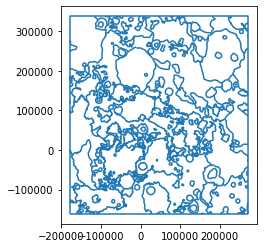

In [8]:

asg.plot()
show()

asg.to_file("lines.gpkg", layer="lines", driver="GPKG")

In [ ]:
import itertools
for l1, l2 in itertools.combinations(asg.geometry, 2):
    if l1.overlaps(l2):
        print("o")
        a, b = l1, l2